# <center>Monte Carlo Algorithms</center>

Monte Carlo **infers** the unkown value of a quantity over a population from an average over a samll examples s **taken at random**.


*   The quantity is the physical observable, e.g. the energy, the position of a given particle... 
*   The population is the ensemble of all examples (e.g.  all the possible configurations of a physical model). In general the examples can have different weights. 

How one can produce an unbiased random example? The first strategy that I will present is called **Direct Sampling**.





##  <center>Direct sampling: computing the number $\pi$</center> 


Consider a perfect circle inscribed in a perfect square. Many pebbles are **evenly** (i.e. at random) drawn inside the square.  The goal is to give an estimation of the number $\pi= 3.141\ldots$ and below you find the practical implementation in Phyton. 

* In this example what is the population? what is the observable?
* Note that the success of our Monte Carlo is based on the existence of a uniform (pseudo) random number generator. 


In [1]:
from random import uniform
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = uniform(-1.0, 1.0), uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits
N_trials = 10000
for attempt in range(10):
    print (attempt, 4 * direct_pi(N_trials) / float(N_trials))

0 3.134
1 3.1584
2 3.1508
3 3.1264
4 3.1428
5 3.1452
6 3.1412
7 3.1064
8 3.1396
9 3.12




It is convenient to re-write our problem in a more general and instructive way: 
$$
 \langle O\rangle = \frac{ \int_{-1}^{1} dx \int_{-1}^{1} dy \,  \pi(x,y) \, O(x,y) } { \int_{-1}^{1} dx \int_{-1}^{1} dy \, \pi(x,y) }$$


*   The positive function $\pi(x,y)$ is the (non normalized) weight of each example of the population. 
For our problem the points inside the square have  $ \pi(x,y)= 1$, the points outside the square have $\pi(x,y)= 0$.
*   $O(x,y)$ is the physical observable, the quantity we want to average. For our problem the observable  is the "hitting variable":
 $O(x,y)= 4$ if the pebble is within the circle and $O(x,y)=0$ otherwise.


Monte Carlo approximates the observable, averaged over all the population, $\langle O\rangle$, with an average over few ($N_{\text{trials}}$) examples: 

$$
\langle O\rangle \approx \frac{1}{N_{\text{trials}}} \sum_{i=1}^{N_{\text{trials}}} O(x_i,y_i)
$$

We call the protocol used in our Python code **direct sampling** as each example $(x_i,y_i)$ is freshly drawn, without correlations with previous examples. Thus $O(x_1, y_1),O(x_2, y_2), \ldots$ are identical and independently distributed (i.i.d.) random variables. The central limit theorem associates a statistical error to the Monte Carlo approxiamtion :

 $$ \text{error}= \frac{ \text{std}\left[O(x_i,y_i) \right]}{\sqrt{N_{\text{trials}}}}$$



Let's now go back to our original Monte Carlo problem, the stochastic computation of the number $\pi$ yields to

$$  \pi = 3.141\ldots \approx 4 \frac{N_{\text{hits}}}{N_{\text{trials}}}$$

the associated error is

$$ \sim \frac{4}{\sqrt{N_{\text{trials}}}} \sqrt{\frac{N_{\text{hits}}}{N_{\text{trials}}} (1-\frac{N_{\text{hits}}}{N_{\text{trials}}}) }$$

and becomes smaller and smaller by increasing $N_{\text{trials}}$ (goes as $1/\sqrt{N_{\text{trials}}}$).


## <center> Markov Chain Monte Carlo: computing $\pi$ with  Metropolis </center>

Direct sampling is the perfect stochastic method to perform a multidimenaional integrals. 
But is it easy to draw $N_{\text{trials}}$ unbiased examples from a given population? In general it is not, absolutely not.
 During this semester we will see that Direct sampling is often possible when the physical model is analytically tractable. In difficult problems how to select from scratch an unbiased example is an open and maybe unsovable question.


Nick Metropolis and collaborators found in 1953 a very general method to sample unbiased examples. The price to pay is to renounce to direct sampling and to adopt a Markov chain strategy. Even today, Markov Chain Monte Carlo is one of the most powerful numerical method we dispose. 


Let us discuss Metropolis' idea on the same problem as before.
* **Starting Point:** an allowed example $(x_0,y_0)$. Note that $(x_0,y_0)$ is not forced to be  unbiased it is just taken from the population
* **Proposition step:** Starting from the last position $(x_i,y_i)$  draw a new position $(x_{\text{new}},y_{\text{new}})$ inside a square of side $\delta$. 
* **Metropolis rejection:** An important rejection problem has to be fixed every time the new pebble jumps outside the square. Metropolis solution is: - If $(x_{\text{new}},y_{\text{new}})$ is inside the square then $(x_{i+1},y_{i+1})=(x_{\text{new}},y_{\text{new}})$. - If $(x_{\text{new}},y_{\text{new}})$ is outside the square then $(x_{i+1},y_{i+1})= (x_i,y_i)$ and $(x_{\text{new}},y_{\text{new}})$ is rejected.

We will prove that after few iteration one obtains unbaised examples. The examples are clearly not independent, but after an initial transient they are all unbaised.

In [ ]:
from random import uniform
def markov_pi(delta, N):
    x, y = 1.0, 1.0
    N_hits = 0
    for i in range(N):
        del_x, del_y = uniform(-delta, delta), uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs( y + del_y ) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0:         
           N_hits += 1.0
    return N_hits
N_trials = 10000
delta=0.1
for k in range(10):
    print (4 * markov_pi(delta, N_trials) / float(N_trials), " delta=", delta)


3.2284  delta= 0.1
3.286  delta= 0.1
2.8572  delta= 0.1
3.0104  delta= 0.1
3.1932  delta= 0.1
3.0228  delta= 0.1
3.3236  delta= 0.1
3.2084  delta= 0.1
3.1376  delta= 0.1
3.0832  delta= 0.1


### 1/2 Thumb Rule
Metropolis algorithm is correct for all step sizes $\delta$, but the error we make depend on $\delta$. The rule of thumb for the best $\delta$: the acceptance ratio of Markov chain should be close to $1/2$


# <img src="http://lptms.u-psud.fr/membres/rosso/pebbles.png" style="width:750px;" align=middle/> 



## <center> Homogeneous pebble game</center>

For simplicity we discuss a simplified and discrete 3x3 pebble game. The pebble walks on a 3x3-chessboard without periodic boundary conditions.
The population is represented by the 9 positions 1,2,...,9. With a Markov chain algorithm we can move towards one of the neighbors (up, down, left or right). We design the probability to move, so that each position is visited with the same probability. Suppose we are on site a=9, at time one. We can only move to b=8 or c=6, or simply remain at a. This gives


$$
p_{a \to a} + p_{a \to b} + p_{a \to c} = 1
$$


On the same time, to get to a, we either come from a, or from b or from c.


$$
\pi(a)p(a \to a) + \pi(b) p(b\to a) + \pi(c) p(c \to a) = \pi(a)
$$

this gives

###  <center>global balance condition</center>



$$
\pi(b) p(b\to a) + \pi(c) p(c \to a) = \pi(a) p(a\to b) + \pi(a) p(a \to c)$$

A more restrictive condition is called 

### <center>detailed balance condition</center>



$$
\pi(b) p(b\to a) = \pi(a) p(a\to b)
$$

Metropolis rule is a particular implementation of the detailed balance condition: every time a move at random in one of the four directions is proposed to the walker. If the move is not allowed, the walker stays otherwise it moves. Below a Python implementation for the 3x3 pebble game. 
the walker select on of the four neighbors. For example for the site 1 the neighbors are (2,4,1,1). This ensures that the pebble moves with probability 1/4 to sites 2 and 4, and remains on site 1 with probability 1/2. 






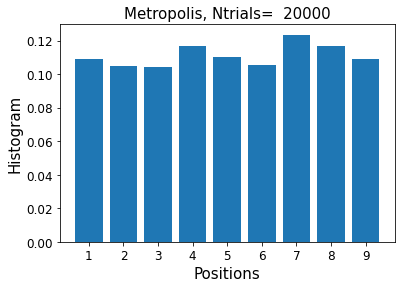

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}
all_pos = []
N_trials = 20000
pos = 9
for iter in range(N_trials):
    pos = neighbor[ pos][ random.randint(0, 3)]
    all_pos.append(pos)

heights = np.bincount(np.array(all_pos)-1)
heights = heights/np.sum(heights)
plt.bar(range(1,10), heights)
plt.xticks(range(1,10), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Metropolis, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('Positions', fontsize=15)
#pylab.savefig('histo_3x3_steps.png')
plt.show()

### <center> **WARINING**  </center>

A big deception awaits you if you replace a single long run with many short ones! Play with the code below, use a mdoerate N_iter and understand the difference. 

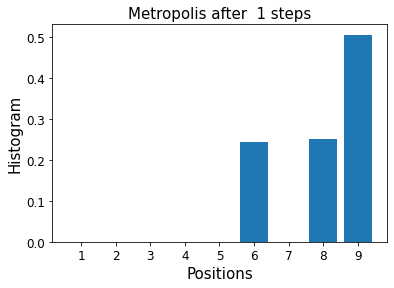

In [ ]:
import random, pylab
neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}
all_pos = []
N_iter = 1
for iter1 in range(10000):
    pos = 9
    for iter in range(N_iter):
        pos = neighbor[ pos][ random.randint(0, 3)]
    all_pos.append(pos)
heights = np.bincount(np.array(all_pos)-1)
heights = heights/np.sum(heights)
plt.bar(range(1,10), heights)
plt.xticks(range(1,10), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Metropolis after  '+str(N_iter)+' steps', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('Positions', fontsize=15)
#pylab.savefig('histo_3x3_steps.png')
plt.show()    

## <center>   Inhomogeneous pebble game </center>

For a general probability distribution $\left( \pi(1),\pi(2), \dots, \pi(9) \right)$, the Metropolis rule we have adopted should be improved. A particular solution of the detailed balance condition  corresponds to the celebrated


### <center> Metropolis algorithm</center>
$$p(a \to b) = \min(1, \pi(b)/\pi(a) ) $$



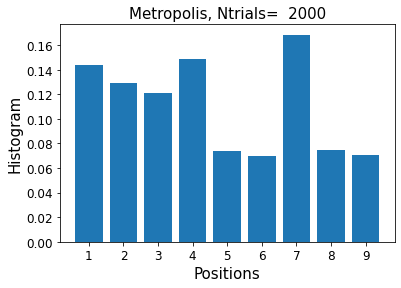

In [2]:
import random, pylab
neighbor = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}
all_pos = []
N_trials = 2000
weight= {1 : 2., 2 : 2., 3 : 2., 4 : 2., 5 : 1., 6 : 1.,7 : 3., 8 : 1., 9 : 1.}
pos = 9
for iter in range(N_trials):
    posnew = neighbor[pos][ random.randint(0, 3)]
    x = random.uniform(0,1)
    y = weight[posnew]/weight[pos]
    if x < y :
       pos=posnew 
    all_pos.append(pos)
heights = np.bincount(np.array(all_pos)-1)
heights = heights/np.sum(heights)
plt.bar(range(1,10), heights)
plt.xticks(range(1,10), fontsize=12)
plt.yticks(fontsize=12)
plt.title('Metropolis, Ntrials=  '+str(N_trials)+'', fontsize=15)
plt.ylabel('Histogram', fontsize=15)
plt.xlabel('Positions', fontsize=15)
#pylab.savefig('histo_3x3_steps.png')
plt.show()

### Comments

* Markov-chain Monte Carlo algorithms are a very general tool for integration.
* They access the relevant information in the infinite-time limit (see tutorial).
* The dynamics of the Markov-chain Monte Carlo algorithm is not always physically relevant.
* Many Markov-chain Monte Carlo algorithms satisfy detailed balance, but the necessary condition is global balance.

### References
*  We were deeply inspired by the first chapter of SMAC pp 1-9; 15-22
*  N. Metropolis, A.W. Rosenbluth, M.N. Rosenbluth, A.H. Teller and E. Teller, J. Chem. Phys. 21, 1087 (1953)